In [ ]:
# Load the required modules
from keras.layers import GRU, Bidirectional, Layer, TimeDistributed, Dense
from keras.models import model_from_json, Model
from keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.patches as patch

import librosa.display
import librosa
import numpy as np
import os, sys
import copy

In [ ]:
# Load the test data create the test dataset
# load the file list
featTestPath = "/homeLocal/eriador/Documents/Corpus/DCASE2018/features_2/test/mel"
featTestList = os.listdir(featTestPath)

# load the meta data ----
metaPath = "/homeLocal/eriador/Documents/Corpus/DCASE2018/meta/test.csv"
with open(metaPath, "r") as metaFile:
    metadata = metaFile.read().splitlines()[1:]
    
metadata = [i.split("\t") for i in metadata]

# load the features
featTest = []
for file in featTestList:
    path = os.path.join(featTestPath, file)
    feature = np.load(path)
    
    # preprocessing
    feature = np.expand_dims(feature, axis=-1)
    featTest.append(feature)
    
featTest = np.array(featTest)

In [5]:
##### load the model and perform prediction
K.clear_session()
modelJsonPath = "/homeLocal/eriador/Documents/DCASE2018/results/testing/mel_noGRU/experiment_noGRU_model.json"
modelWeightPath = "/homeLocal/eriador/Documents/DCASE2018/results/testing/mel_noGRU/experiment_noGRU_weight.h5py"

with open(modelJsonPath, "r") as modelJsonFile:
    model = model_from_json(modelJsonFile.read())
model.load_weights(modelWeightPath)
model.summary()

intermediate_model = Model(input=model.input, output=model.get_layer("time_distributed_1").output)
intermediate_model.summary()


# retreive information about the custom
prediction = intermediate_model.predict(featTest)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 431, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 431, 64)       640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 431, 64)       256       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 431, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 431, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 431, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 431, 64)       36928     
__________

/homeLocal/eriador/.miniconda3/envs/dcase/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ti...)`
  # This is added back by InteractiveShellApp.init_path()


In [6]:
print(prediction.shape)

(279, 431, 10)


Y-mdPX2djAUY_10.000_20.000.wav.npy
0.115,1.177,Dog
2.9019999999999997,3.895,Dog
4.9910000000000005,6.486000000000001,Dog
7.53,8.187999999999999,Dog
8.956,10.0,Dog



<Figure size 432x288 with 0 Axes>

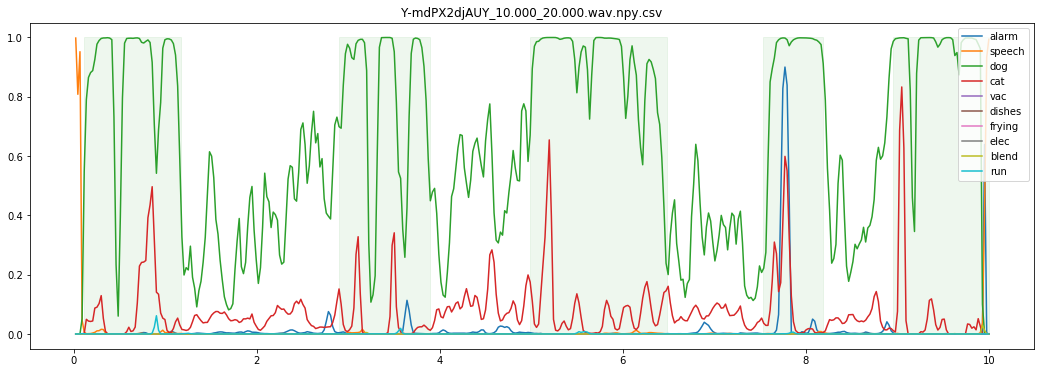

Y0cGgIDhIfdA_30.000_40.000.wav.npy
3.2960000000000003,4.394,Dog
5.003,6.109,Dog
7.362,8.988999999999999,Dog



<Figure size 432x288 with 0 Axes>

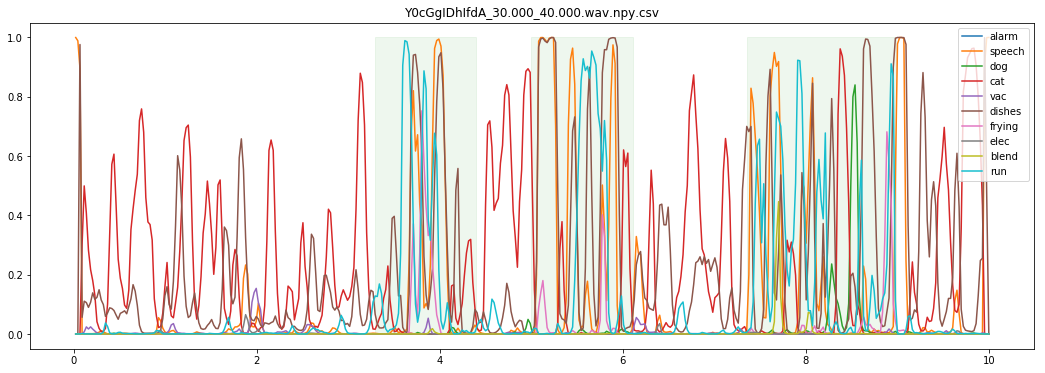

YgY1k1H3JwLw_30.000_40.000.wav.npy
0.10400000000000001,1.2409999999999999,Speech
1.714,2.787,Speech
3.185,7.478,Speech
5.712999999999999,10.0,Electric_shaver_toothbrush
7.94,8.806000000000001,Speech



<Figure size 432x288 with 0 Axes>

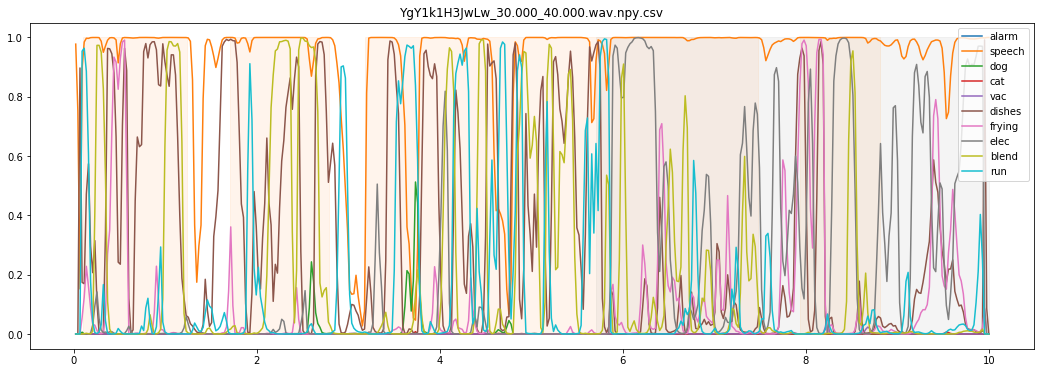

Y5X8F5Sthk4Q_80.000_90.000.wav.npy
0.0,4.659,Running_water



<Figure size 432x288 with 0 Axes>

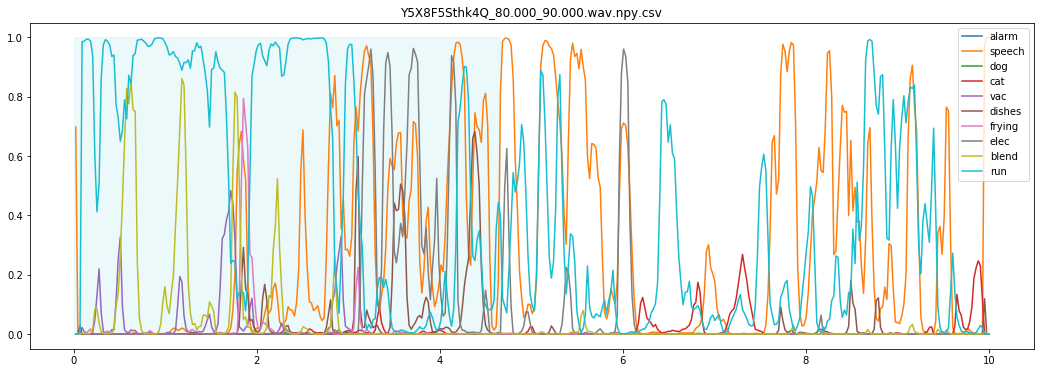

Y1FADrYkCEjY_30.000_40.000.wav.npy
0.0,1.183,Alarm_bell_ringing
1.702,6.226,Speech
6.445,8.886000000000001,Speech



<Figure size 432x288 with 0 Axes>

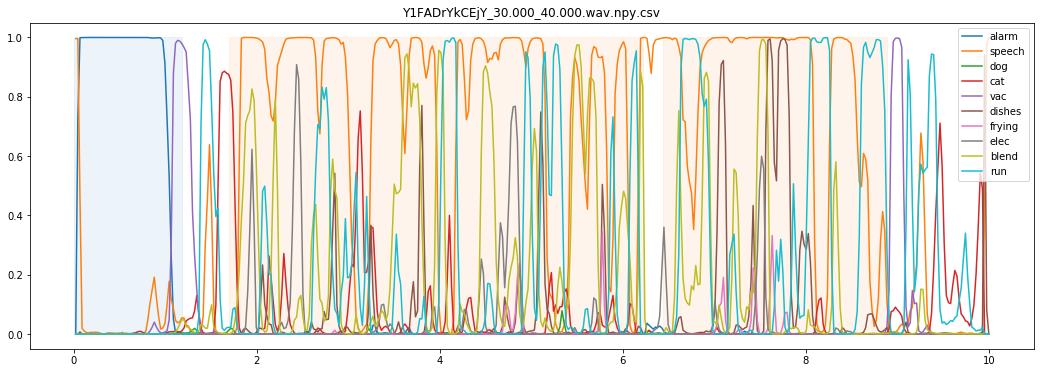

Y6PwBeL3Abl8_60.000_70.000.wav.npy
0.0,1.318,Speech
2.7939999999999996,4.535,Speech
4.129,4.453,Blender
4.724,5.335,Blender
4.724,6.0760000000000005,Blender
5.4,6.0760000000000005,Blender
6.635,9.118,Blender
9.435,9.882,Blender



In [ ]:
# process the prediction (intermediate model)
nbFileToDisplay = 40
boundaries = True

classes = "time,Alarm_bell_ringing,Speech,Dog,Cat,Vacuum_cleaner,Dishes,Frying,Electric_shaver_toothbrush,Blender,Running_water".split(",")
output = "time,Alarm_bell_ringing,Speech,Dog,Cat,Vacuum_cleaner,Dishes,Frying,Electric_shaver_toothbrush,Blender,Running_water\n"
Colors = "C0,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,#c2c2c2".split(",")

def getClasses(file):
    output = ""
    for info in metadata:
        if info[0] == file[:-4]:
            output += ",".join(info[1:]) + "\n"
            
    return output

# display
def drawVLines(file, ax):
    rawBoundaries = getClasses(file[:-4])
    rawBoundaries = rawBoundaries.split("\n")
    print(file[:-8])
    
    
    
def display(filePath):
    with open(filePath, "r") as f:
        raw = f.read().splitlines()[1:]
    data = []
    for r in raw:
        data.append(r.split(","))
    
    data = np.array(data)
    time = np.array(data[:,0], np.float32)
    alarm = np.array(data[:,1], np.float32)
    speech = np.array(data[:,2], np.float32)
    dog = np.array(data[:,3], np.float32)
    cat = np.array(data[:,4], np.float32)
    vac = np.array(data[:,5], np.float32)
    dishes = np.array(data[:,6], np.float32)
    frying = np.array(data[:,7], np.float32)
    elec = np.array(data[:,8], np.float32)
    blend = np.array(data[:,9], np.float32)
    run = np.array(data[:,10], np.float32)
    #blk = np.array(data[:,11], np.float32)
    
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(18,6))
    plt.title(filePath)
    ax.plot(time, alarm, label="alarm", color=Colors[classes.index("Alarm_bell_ringing")])
    ax.plot(time, speech, label="speech", color=Colors[classes.index("Speech")])
    ax.plot(time, dog, label="dog", color=Colors[classes.index("Dog")])
    ax.plot(time, cat, label="cat", color=Colors[classes.index("Cat")])
    ax.plot(time, vac, label="vac", color=Colors[classes.index("Vacuum_cleaner")])
    ax.plot(time, dishes, label="dishes", color=Colors[classes.index("Dishes")])
    ax.plot(time, frying, label="frying", color=Colors[classes.index("Frying")])
    ax.plot(time, elec, label="elec", color=Colors[classes.index("Electric_shaver_toothbrush")])
    ax.plot(time, blend, label="blend", color=Colors[classes.index("Blender")])
    ax.plot(time, run, label="run", color=Colors[classes.index("Running_water")])
    #ax.plot(time, blk, label="blk", color=Colors[classes.index("blank")])
    ax.legend(loc="upper right")
    
    # add patches to highlight ground truth
    tBoundaries = rawBoundaries.split("\n")
    for line in tBoundaries:
        info = line.split(",")
        if len(info) == 3:
            color = Colors[classes.index(info[2])]
            start = float(info[0])
            end = float(info[1]) - float(info[0])
            rect = patch.Rectangle(
                (start,0),end,1,
                linewidth=1,
                edgecolor=color,
                facecolor=color,
                alpha=0.08)
            
            ax.add_patch(rect)

            #plt.axvline(x=info[0], color = Colors[classes.index(info[2])], alpha=0.15)
            #plt.axvline(x=info[1], color = Colors[classes.index(info[2])], alpha=0.15)
        
    plt.show()

for i in range(len(prediction[:nbFileToDisplay])):
    step = prediction.shape[1]
    clip = prediction[i]
    file = featTestList[i]
    print(file)
    rawBoundaries = getClasses(file)
    print(rawBoundaries)
    
    classes = "time,Alarm_bell_ringing,Speech,Dog,Cat,Vacuum_cleaner,Dishes,Frying,Electric_shaver_toothbrush,Blender,Running_water,blank".split(",")
    output = "time,Alarm_bell_ringing,Speech,Dog,Cat,Vacuum_cleaner,Dishes,Frying,Electric_shaver_toothbrush,Blender,Running_water,blank\n"
    
    with open(file + ".csv", "w") as toSave:
        frameCounter = 0
        for frame in clip:
            frameCounter += 10 / step
            output += "%.4f," % frameCounter
            for cls in frame:
                output += "%.4f," % cls
            output += "\n"
        toSave.write(output)
        display(file + ".csv")